In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [92]:
customer = pd.read_csv(r"D:\Python Case Study\4.Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [93]:
spend = pd.read_csv(r"D:\Python Case Study\4.Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [94]:
repayment = pd.read_csv(r"D:\Python Case Study\4.Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")
repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


##  Exploratory Data Analysis 

####  shape of the data sets 

In [97]:
print(customer.shape)
print(spend.shape)
print(repayment.shape)

(100, 8)
(1500, 5)
(1523, 5)


####  data sets info 

In [99]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [100]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [101]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


#### changing Data Types 

In [103]:
spend['Month'] = pd.to_datetime(spend['Month'],   )
spend.dtypes

Sl No:               int64
Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [104]:
repayment['Month'] = pd.to_datetime(repayment['Month'], format='%d-%b-%y')
repayment.dtypes

SL No:               float64
Customer              object
Month         datetime64[ns]
Amount               float64
Unnamed: 4           float64
dtype: object

#### Dropping columns present in 'repayment'  and 'customer' and 'spend'data set 

In [106]:
repayment.drop(columns=['SL No:', 'Unnamed: 4'],axis =1 ,inplace=True)
repayment

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88
...,...,...,...
1518,NaN,NaT,NaN
1519,NaN,NaT,NaN
1520,NaN,NaT,NaN
1521,NaN,NaT,NaN


In [107]:
customer.drop(columns=['No'],axis =1 ,inplace=True)
customer

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [108]:
spend.drop(columns=['Sl No:'],axis =1 ,inplace=True)
spend

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73
1496,A68,2006-03-25,BUS TICKET,204971.10
1497,A69,2006-03-31,BUS TICKET,50449.44
1498,A70,2006-03-23,BUS TICKET,80593.94


#### NULL values in datasets and handling with Null values

In [110]:
customer.isna().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [111]:
spend.isna().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [112]:
repayment.isna().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [113]:
### Dropping null values

+

In [114]:
repayment.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [115]:
repayment

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88
...,...,...,...
1495,A67,2005-05-09,55638.77
1496,A68,2006-05-10,319836.49
1497,A69,2006-07-11,247628.45
1498,A70,2005-08-12,454016.51


#### Changing Column name month to Date 

In [117]:
spend.rename(columns={'Month':'Date'},inplace=True)
spend

,Customer,Date,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73
1496,A68,2006-03-25,BUS TICKET,204971.10
1497,A69,2006-03-31,BUS TICKET,50449.44
1498,A70,2006-03-23,BUS TICKET,80593.94


In [118]:
repayment.rename(columns={'Month':'Date'},inplace=True)
repayment

,Customer,Date,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88
...,...,...,...
1495,A67,2005-05-09,55638.77
1496,A68,2006-05-10,319836.49
1497,A69,2006-07-11,247628.45
1498,A70,2005-08-12,454016.51


#### Checking duplicated value 

In [120]:
customer.duplicated().sum()

0

In [121]:
spend.duplicated().sum()

0

In [122]:
repayment.duplicated().sum()

0

In [123]:
### no duplicted value found

#### Checking outlires¶ 

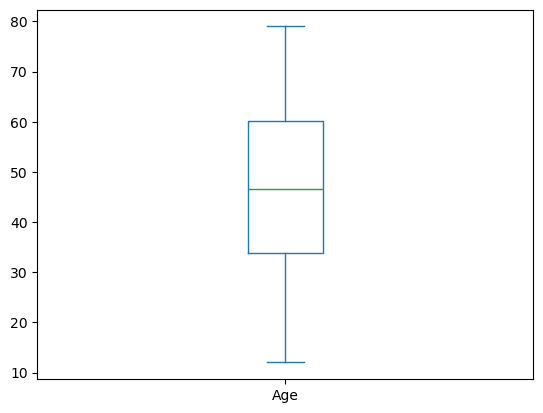

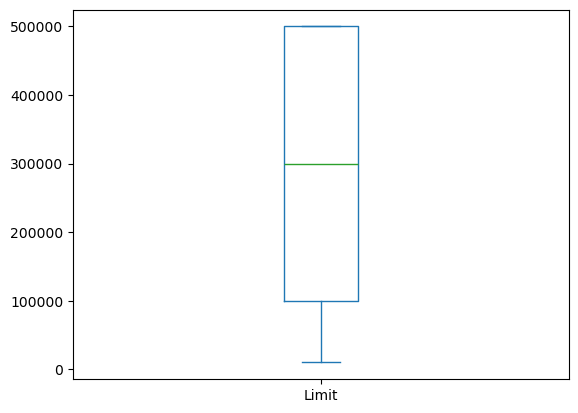

In [125]:
for i in customer.columns:
    if customer[i].dtype in ('float64','int64'):
        customer[i].plot(kind='box')
        plt.show()

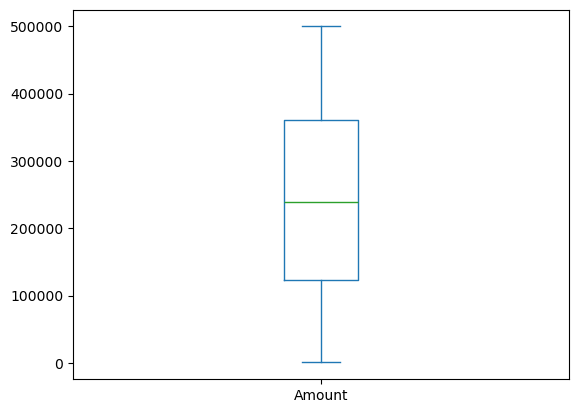

In [126]:
for i in spend.columns:
    if spend[i].dtype in ('float64','int64'):
        spend[i].plot(kind='box')
        plt.show()

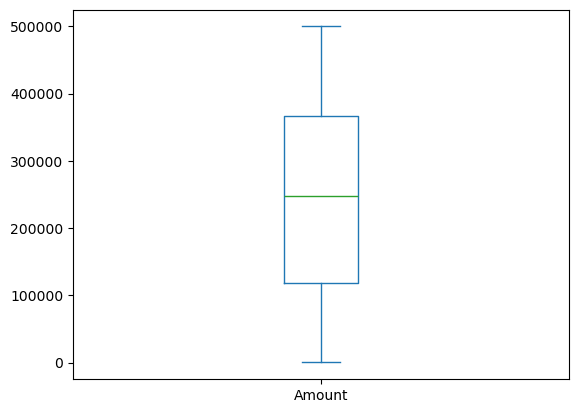

In [127]:
for i in repayment.columns:
    if repayment[i].dtype in ('float64','int64'):
        repayment[i].plot(kind='box')
        plt.show()

In [128]:
### no outliers found in spend , customer and repayment datasets

## Ques1 : In the above dataset, 

#### (a). In case age is less than 18, replace it with mean of age values

In [131]:
(customer.Age<18).sum()

6

In [132]:
customer[customer['Age'] < 18]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [133]:
mean_original = customer["Age"].mean()
print("The mean of Age column is",mean_original)

The mean of Age column is 46.49


In [134]:
age=lambda x:round(customer.Age.mean()) if x<18 else x
customer.Age=customer.Age.apply(age)
customer

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [135]:
(customer.Age<18).sum()

0

#### (b). In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [137]:
customer_spend = pd.merge(left=customer,right=spend,on='Customer')
 
customer_spend=customer_spend.rename(columns={'Amount':'Spend_Amount'})

customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Spend_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [138]:
customer_spend.Spend_Amount =np.where(customer_spend.Spend_Amount >customer_spend.Limit,0.5*customer_spend.Limit,customer_spend.Spend_Amount)
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Spend_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


In [139]:
(customer_spend.Spend_Amount>customer_spend.Limit).sum()

0

#### (c). Incase the repayment amount is more than the limit, replace the repayment with the limit. 

In [141]:
customer_repay=pd.merge(left=customer,right=repayment,on='Customer')

customer_repay = customer_repay.rename(columns={'Amount':'Repayment_Amount'})
customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Repayment_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [142]:
customer_repay.Repayment_Amount = np.where(customer_repay.Repayment_Amount>customer_repay.Limit,customer_repay.Limit,customer_repay.Repayment_Amount)
customer_repay

,Customer,Age,City,Product,Limit,Company,Segment,Date,Repayment_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [143]:
(customer_repay.Repayment_Amount>customer_repay.Limit).sum()

0

### Ques2 . From the above dataset create the following summaries: 

#### (a). How many distinct customers exist? 

In [146]:
distinct_customers = customer["Customer"].nunique()

print("Number of distinct customers are",distinct_customers)

Number of distinct customers are 100


#### (b) How many distinct categories exist? 

In [148]:
print('Number of distint categories by segment : ',customer.Segment.nunique())
print(customer.Segment.drop_duplicates())

Number of distint categories by segment :  5
0    Self Employed
1     Salaried_MNC
2     Salaried_Pvt
3             Govt
4    Normal Salary
Name: Segment, dtype: object


#### (c)  What is the average monthly spend by customers? 

In [150]:
### creating new columns which show "Month" and "Year"
spend['Month'] = spend['Date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

spend['Year'] = spend['Date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
spend.head()

,Customer,Date,Type,Amount,Month,Year
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [151]:
avg_spend= spend.groupby(['Year','Month'])[['Amount']].mean()
avg_spend

Amount
Year Month                   
2004 April      235272.037143
     February   221215.270000
     January    251712.068664
     March      232146.119286
     May        217539.236429
     November   270486.397857
     September  310923.383571
2005 April      252181.326429
     August     233734.634286
     December   147503.060000
     February   229802.279821
     January    292741.372857
     July       229116.663571
     June       262688.112857
     May        245696.515429
     November   286143.322857
     October    194568.640714
     September  188666.202143
2006 April      232468.967553
     August     240699.717143
     December   270470.980714
     February   253858.260714
     January    282058.006429
     July       287505.098929
     June       177252.386429
     March      247166.084654
     May        236162.740357
     November   182841.290000
     October    236136.335000
     September  158520.090714

#### (d) What is the average monthly repayment by customers?
 

In [153]:
#creating new columns which show "Month" and "Year"
repayment['Month'] = repayment['Date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

repayment['Year'] = repayment['Date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [154]:
avg_repayment = repayment.groupby(['Year','Month'])[['Amount']].mean()
avg_repayment

Amount
Year Month                   
2004 April      259141.679000
     February   256702.630741
     January    243489.649786
     March      252585.280667
     May        226162.720800
     November   209592.238000
     September  184487.848750
2005 April      212688.631333
     August     264430.921622
     December   320379.335833
     February   238829.265123
     January    240548.098148
     July       239871.479167
     June       210199.818333
     May        263207.367857
     November   256695.120000
     October    219849.956667
     September  247700.170000
2006 April      275472.251889
     August     224143.992500
     December   252736.569167
     February   284489.565128
     January    293475.389167
     July       257936.383243
     June       251990.453333
     March      240851.266814
     May        256920.884943
     November   199399.197407
     October    260765.480000
     September  262533.880833

#### (e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [156]:
res = pd.merge(left=avg_spend,right=avg_repayment,on=['Year','Month'])
res.head()

Amount_x       Amount_y
Year Month                                 
2004 April     235272.037143  259141.679000
     February  221215.270000  256702.630741
     January   251712.068664  243489.649786
     March     232146.119286  252585.280667
     May       217539.236429  226162.720800

In [157]:
res.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)
res.head()

Spend_Amount   Repay_Amount
Year Month                                 
2004 April     235272.037143  259141.679000
     February  221215.270000  256702.630741
     January   251712.068664  243489.649786
     March     232146.119286  252585.280667
     May       217539.236429  226162.720800

In [158]:
res['Monthly Profit']=res.Repay_Amount-res.Spend_Amount


In [159]:
res['Profit']=np.where(res['Monthly Profit']>0,2.9*(res['Monthly Profit'])/100,0)
res.head()

Spend_Amount   Repay_Amount  Monthly Profit       Profit
Year Month                                                              
2004 April     235272.037143  259141.679000    23869.641857   692.219614
     February  221215.270000  256702.630741    35487.360741  1029.133461
     January   251712.068664  243489.649786    -8222.418879     0.000000
     March     232146.119286  252585.280667    20439.161381   592.735680
     May       217539.236429  226162.720800     8623.484371   250.081047

#### (f) What are the top 5 product types? 

In [161]:
spend['Type'].value_counts().head()

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

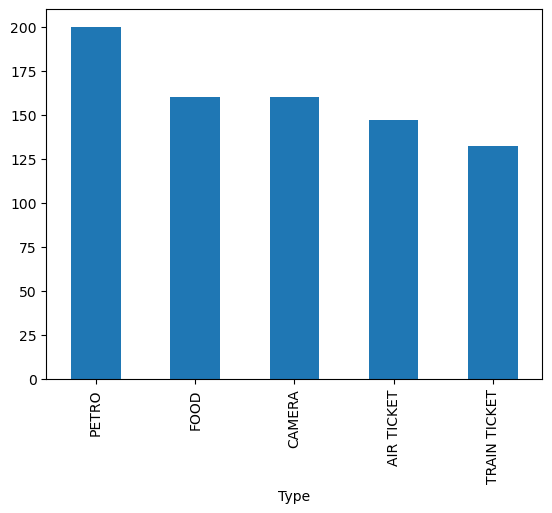

In [162]:
spend['Type'].value_counts().head(5).plot(kind='bar')
plt.show()

#### (g) Which city is having maximum spend? 

In [164]:
customer_spend.groupby('City')[['Spend_Amount']].sum().sort_values(by='Spend_Amount',ascending=False).head(1).index[0]

'COCHIN'

In [165]:
#  Cochin has having maximum spend.

#### (h) Which age group is spending more money? 

In [1]:
Age_range=[18,30,40,50,60,70,80]
labels=['18-30','31-40','41-50','51-60','61-70','71-80']
customer_spend['Age group']=pd.cut(customer_spend['Age'],bins=Age_range,labels=labels)

NameError: name 'pd' is not defined

In [168]:
customer_spend.groupby('Age group', observed=True)[['Spend_Amount']].sum().sort_values(by='Spend_Amount',ascending=False).index[0]


'41-50'

In [169]:
##   "age group 41 - 50 is spending more money"

#### (i) Who are the top 10 customers in terms of repayment? 

In [171]:
customer_repay.groupby("Customer")[["Repayment_Amount"]].sum().sort_values(by="Repayment_Amount",ascending=False).head(10)

,Repayment_Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### Ques3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same 

In [173]:
customer_spend['Year'] = customer_spend['Date'].apply(lambda x:x.year)

In [174]:
City_Wise_Data = pd.pivot_table(data = customer_spend, index = 'City', columns=['Product','Year'], 
               values='Spend_Amount', aggfunc='sum')
City_Wise_Data.head()

Product          Gold                              Platimum              \
Year             2004         2005         2006        2004        2005   
City                                                                      
BANGALORE  9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY     6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA   7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI    1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN     7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   

Product                    Silver                         
Year             2006        2004       2005        2006  
City                                                      
BANGALORE   685831.27  1291852.58  830612.34  1415480.94  
BOMBAY      972130.01   532089.03  508988.54  1092833.80  
CALCUTTA   3589606.66   500006.00  440147.06  1157956.42  
CHENNAI    5024923.40   282056.86  377184.49   350009.50  
COCHIN     4920592.29   814229.62  652269.38  1269990.87

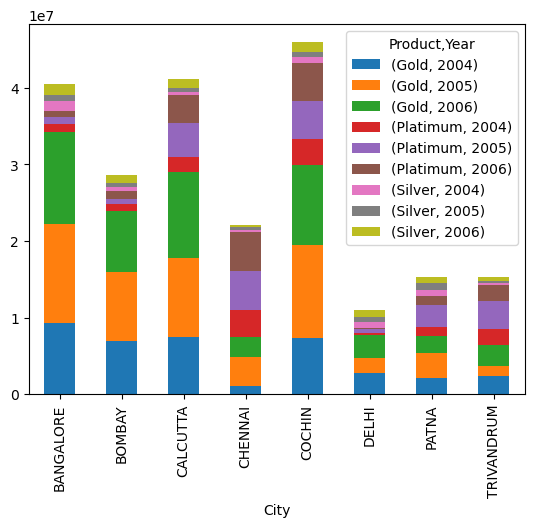

In [175]:
City_Wise_Data.plot(kind='bar',stacked=True)
plt.show()

### Ques4 . Create graphs for

#### (a). Monthly comparison of total spends, city wise 

In [178]:
customer_spend['Monthly'] = customer_spend['Date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Spend_Amount,Age group,Year,Monthly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,71-80,2004,January
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,71-80,2004,January
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,71-80,2004,January
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,71-80,2004,January
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,71-80,2005,January


In [179]:
month_city = customer_spend.groupby(["Monthly","City"])[["Spend_Amount"]].sum().sort_index().reset_index()

In [180]:
month_city =pd.pivot_table(data=customer_spend,values='Spend_Amount',index='City',columns='Monthly',aggfunc='sum')
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


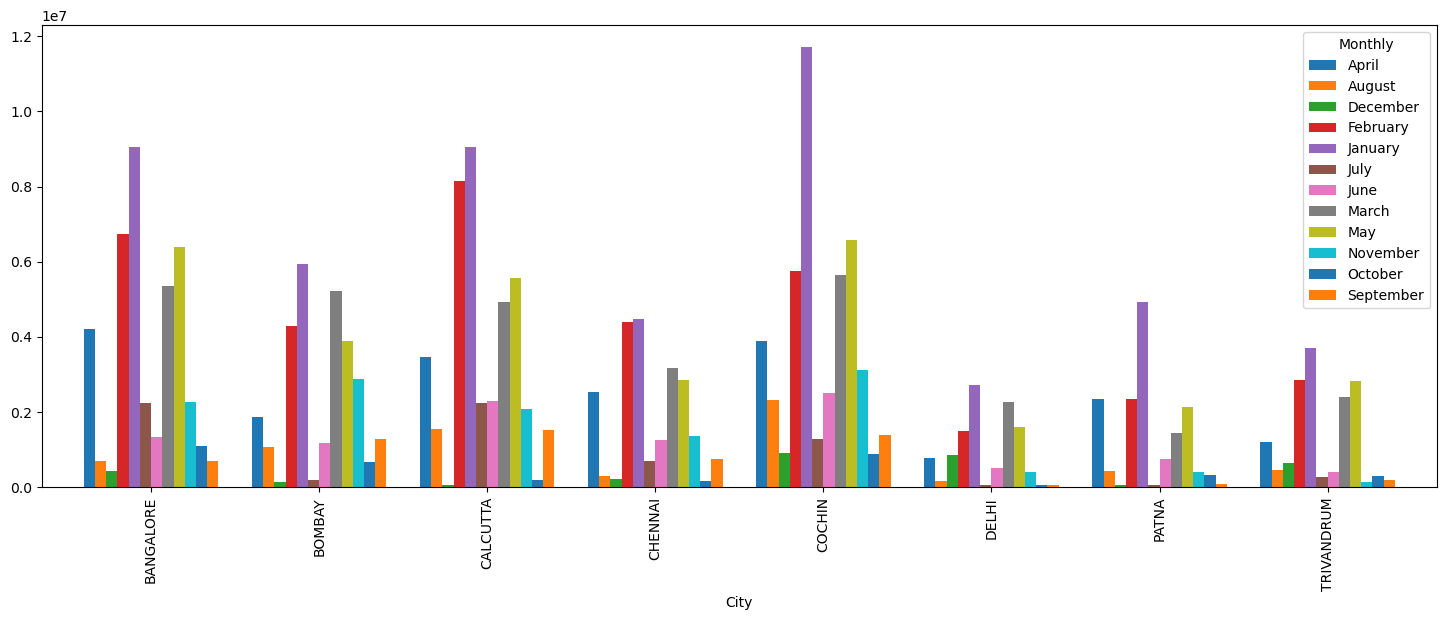

In [181]:
month_city.plot(kind="bar",figsize=(18,6),width=0.8)
plt.show()

#### (b). Comparison of yearly spend on air tickets 

In [183]:
air_tickets = customer_spend.groupby(["Year","Type"])[["Spend_Amount"]].sum().reset_index()


In [184]:
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]
filtered

,Year,Type,Spend_Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


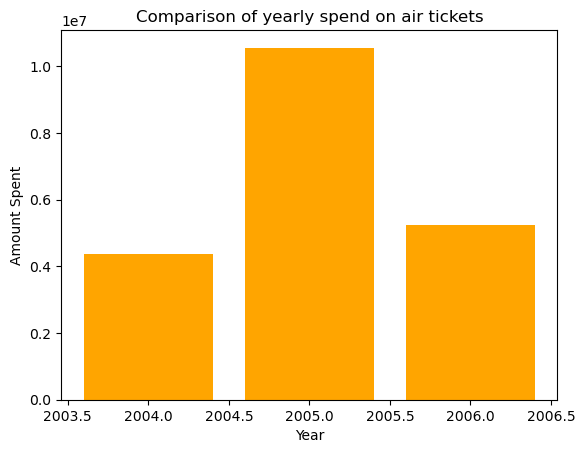

In [185]:
plt.bar(filtered["Year"],height=filtered["Spend_Amount"],color="orange")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

#### (c). Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend) 

In [187]:
product_wise = pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Spend_Amount',aggfunc='sum')
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


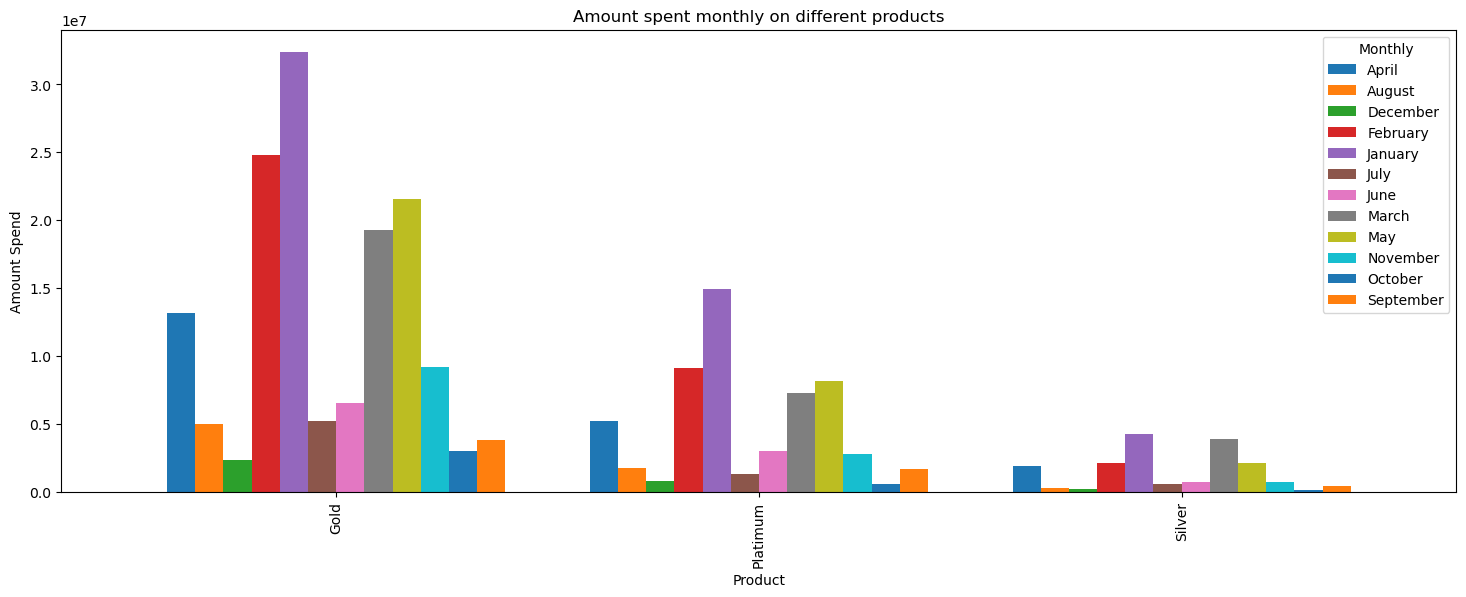

In [188]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

##### Yes,seasonality that exists in terms of spend.We can see from the above  graphs that the sales are high for all the Products during the months:
                    January
                    February
                    March
                    April
                    May
#####  Out of these months,highest sales are in January                    

### Ques5 . Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [200]:
customer_repay['Monthly'] = customer_repay['Date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [202]:
customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Repayment_Amount,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,January,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,January,2005


In [240]:
print('Give the product name and timeperiod for which you want the data')

def summary(product,timeperiod):
    if product=='Gold' and timeperiod=='Monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product =='Gold' and timeperiod=='Yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product=='Silver' and timeperiod=='Monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product=='Silver' and timeperiod=='Yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product=='Platinum' and timeperiod=='Monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product=='Platinum' and timeperiod=='Yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

Give the product name and timeperiod for which you want the data


In [242]:
summary('Gold','Monthly')

Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        Na

In [244]:
summary('Gold','Yearly')

Yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN